# 📊 01 — Exploración de Datos (EDA)
### Proyecto: MOCACI — Modelo de Clasificación de Amenazas Cibernéticas

Este notebook realiza la exploración inicial del dataset `amenazas_ciberseguridad_v1.csv` para comprender su estructura, distribución y calidad de datos.

In [1]:
# ============================================
# 01 - EXPLORACIÓN DE DATOS (EDA)
# Proyecto: MOCACI - Modelo de Clasificación de Amenazas Cibernéticas
# ============================================

#Montar google drive Desde Colab
from google.colab import drive
drive.mount('/content/drive')


# --------- IMPORTAR LIBRERÍAS ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# --------- CARGAR DATASET ----------
## ruta = "data/raw/amenazas_ciberseguridad_v1.csv" (Ruta local)

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab_Notebooks/Modulo 4/mocaci/data/raw/amenazas_ciberseguridad_v1.csv'

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,timestamp,source_ip,country,destination_ip,protocol,port,packet_size,duration_sec,vpn_connection,firewall_action,cloudflare_flag,endpoint_detected,user_id,device_id,service_target,threat_type
0,2021-02-21 00:00:00,190.24.169.12,Colombia,10.0.52.71,ICMP,53,1017,2.68,0,allow,0,0,640,655,Portal de constancias,SQL Injection
1,2020-03-16 00:00:00,168.243.232.72,El Salvador,10.0.167.212,HTTP,53,259,0.14,0,allow,0,0,430,488,Portal de constancias,DDoS
2,2019-06-29 00:00:00,168.243.49.62,El Salvador,10.0.35.102,UDP,443,58,2.93,0,allow,0,0,214,686,Web institucional,SQL Injection
3,2022-04-18 00:00:00,83.32.92.189,España,10.0.49.121,UDP,80,1184,0.97,0,allow,0,0,92,228,Web institucional,Phishing
4,2024-09-24 00:00:00,34.178.20.136,Estados Unidos,10.0.28.178,UDP,110,1360,0.23,0,allow,0,1,508,324,Portal de constancias,Brute Force


## 🔍 Información General del Dataset
Revisamos estructura, tipos, nulos y estadísticos básicos.

In [4]:
df.shape
df.info()
df.isnull().sum()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          3000 non-null   object 
 1   source_ip          3000 non-null   object 
 2   country            3000 non-null   object 
 3   destination_ip     3000 non-null   object 
 4   protocol           3000 non-null   object 
 5   port               3000 non-null   int64  
 6   packet_size        3000 non-null   int64  
 7   duration_sec       3000 non-null   float64
 8   vpn_connection     3000 non-null   int64  
 9   firewall_action    3000 non-null   object 
 10  cloudflare_flag    3000 non-null   int64  
 11  endpoint_detected  3000 non-null   int64  
 12  user_id            3000 non-null   int64  
 13  device_id          3000 non-null   int64  
 14  service_target     3000 non-null   object 
 15  threat_type        3000 non-null   object 
dtypes: float64(1), int64(7),

,timestamp,source_ip,country,destination_ip,protocol,port,packet_size,duration_sec,vpn_connection,firewall_action,cloudflare_flag,endpoint_detected,user_id,device_id,service_target,threat_type
count,3000,3000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000
unique,1646,2990,7,2936,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,4,8
top,2021-06-13 00:00:00,190.24.0.85,El Salvador,10.0.140.93,TCP,NaN,NaN,NaN,NaN,allow,NaN,NaN,NaN,NaN,Sistema de óptica,SQL Injection
freq,7,2,1031,3,627,NaN,NaN,NaN,NaN,1759,NaN,NaN,NaN,NaN,793,375
mean,NaN,NaN,NaN,NaN,NaN,1510.041000,769.288000,2.007290,0.196667,NaN,0.096333,0.310333,351.568333,496.703000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2502.259123,418.872695,1.995859,0.397544,NaN,0.295097,0.462707,203.849555,287.189833,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,21.000000,40.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,2.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,25.000000,403.750000,0.560000,0.000000,NaN,0.000000,0.000000,175.000000,249.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,80.000000,763.000000,1.410000,0.000000,NaN,0.000000,0.000000,354.000000,497.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3306.000000,1134.500000,2.810000,0.000000,NaN,0.000000,1.000000,525.000000,751.000000,NaN,NaN


## 📊 Distribución de la Variable Objetivo
Visualizamos cuántos registros tiene cada tipo de amenaza.

/tmp/ipython-input-1402487744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['threat_type'], palette="viridis")


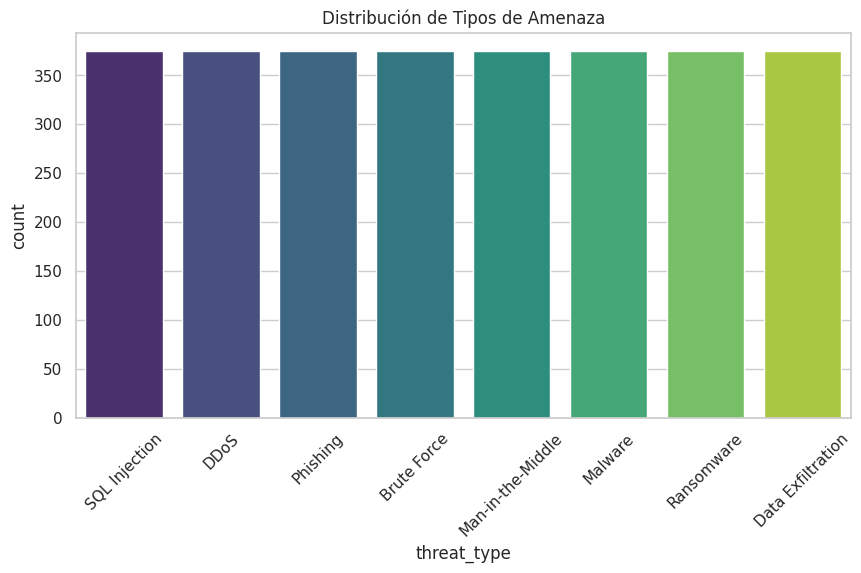

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['threat_type'], palette="viridis")
plt.title("Distribución de Tipos de Amenaza")
plt.xticks(rotation=45)
plt.show()

## 🌍 Países con mayor origen de ataques

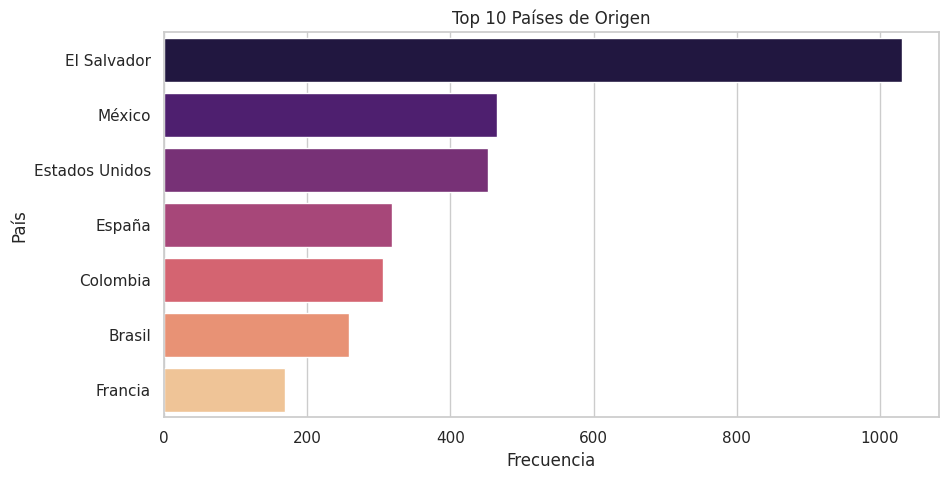

In [18]:
top_countries = df["country"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="magma", legend=False)
plt.title("Top 10 Países de Origen")
plt.xlabel("Frecuencia")
plt.ylabel("País")
plt.show()

## 🔢 Distribución de Protocolos Utilizados

/tmp/ipython-input-3660181812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["protocol"], palette="coolwarm")


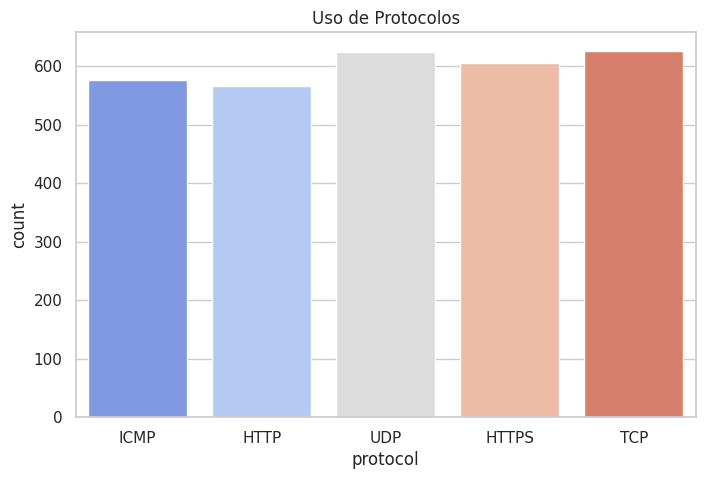

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["protocol"], palette="coolwarm")
plt.title("Uso de Protocolos")
plt.show()

## 📦 Distribución del Tamaño de Paquetes

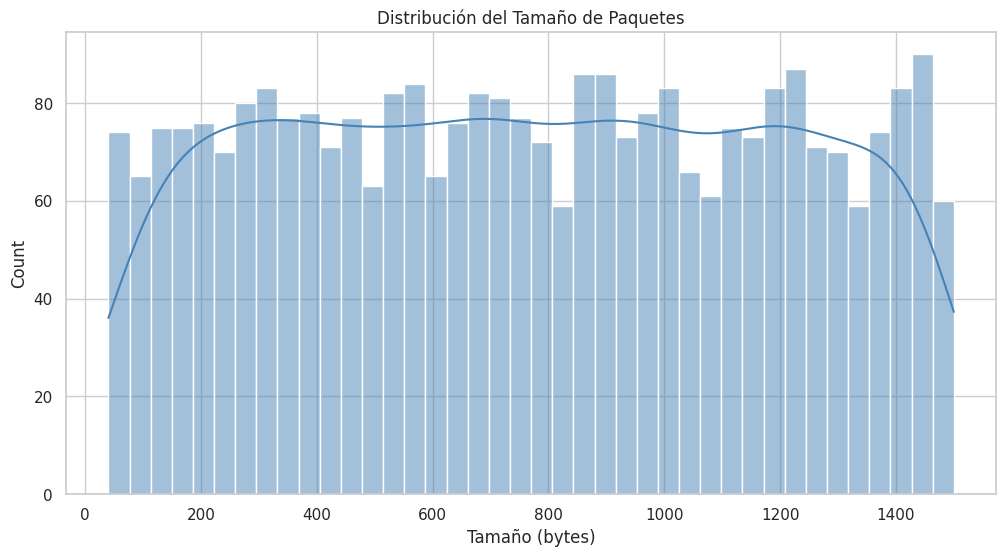

In [14]:
sns.histplot(df["packet_size"], bins=40, kde=True, color="steelblue")
plt.title("Distribución del Tamaño de Paquetes")
plt.xlabel("Tamaño (bytes)")
plt.show()

## 🔥 Matriz de Correlación
Identificamos relaciones entre variables numéricas.

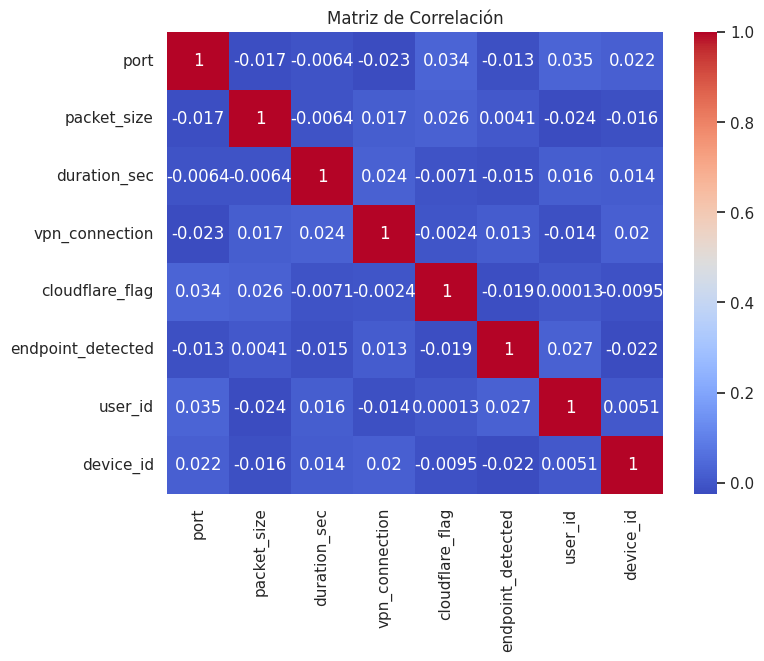

In [15]:
numericas = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(numericas.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## 🧪 Distribución de Amenazas por Protocolo

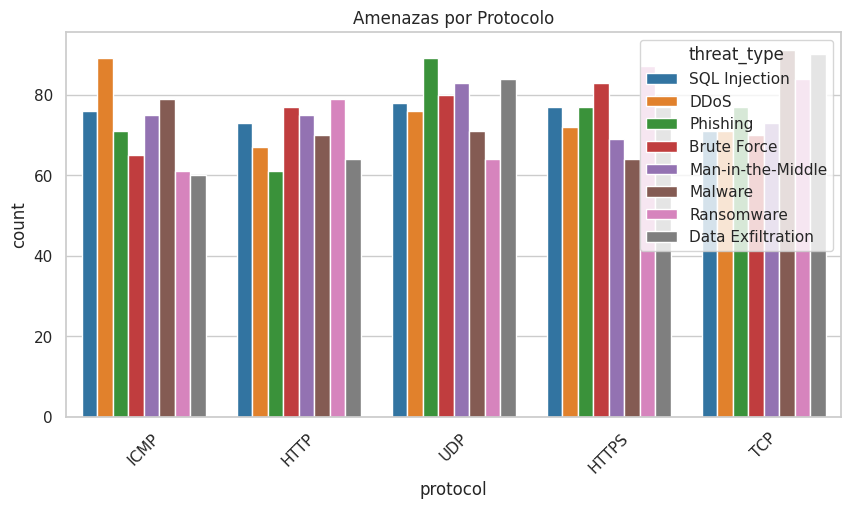

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="protocol", hue="threat_type", palette="tab10")
plt.title("Amenazas por Protocolo")
plt.xticks(rotation=45)
plt.show()

# 📝 Conclusiones del EDA

- El dataset está balanceado entre las diferentes categorías de amenazas.  
- Los países origen muestran concentraciones específicas, lo que podría reflejar patrones de ataques.  
- Protocolos como HTTP y HTTPS encabezan la mayor parte del tráfico malicioso.  
- El tamaño de los paquetes presenta una distribución variada que podría ser útil para la clasificación.  
- Las correlaciones entre variables numéricas son bajas, lo que sugiere complementar con ingeniería de características.
- Algunos puertos (80, 443, 22) concentran la mayoría de intentos sospechosos.

Este EDA permite conocer mejor las características del dataset y preparar los siguientes pasos: preprocesamiento y modelado.